# 05.2 Redes Neuronales - Modelo Bicapa


In [1]:
import pandas as pd
from IPython import display
import numpy as np

In [2]:
run 05.0_Redes_Neuronales_Utilidades.ipynb

<Figure size 432x288 with 0 Axes>

## Fundamento matemático del perceptrón simple bicapa

{cite:p}`rosenblatt1958perceptron` introdujo el __perceptrón simple__ formado por dos capas, una de entrada con n neuronas y una de salida con m neuronas. {cite:p}`widrow1960adaptive` introdujeron el modelo __ADAptative LInear Neuron (Adaline)__ tambien bicapa. Los modelos bicapa tienen la siguiente forma 

$$z_i = b_i + \displaystyle\sum_{j=1}^n w_{ij}x_j \quad (i=1...m)$$
$$a_i = f(z_i) $$

La función de activación más habitual es 

$$f(z)=\sigma(z)=\frac{1}{1+e^{-z}}$$

Por último, la variable objetivo $y^r$, donde $r=1...N$ se convierte en un vector de $m$ posiciones. Así la etiqueta késima tiene todo ceros menos un 1 en la posición k. Por tanto se tiene:

$$y^r=(y_i^r) ~ con ~ i=1...m$$


El entrenamiento se basa en minimizar la función de errores al cuadrado por el procedimiento iterativo de gradiente de descenso. Donde la función de errores al cuadrado es:

$$ C(b_i, w_{ij}) = \frac{1}{2} \displaystyle\sum_{r=1}^N  (a_i^r - y_i^r )^2  \quad (i=1...m) $$
$$ C(b_i, w_{ij}) = \frac{1}{2} \displaystyle\sum_{r=1}^N  \begin{pmatrix} {\large \sigma} \begin{pmatrix} b_i + \displaystyle\sum_{j=1}^n w_{ij}x^r_j \end{pmatrix} - y_i^r\end{pmatrix}^2 \quad (i=1...m) $$

Siendo ${\large y_i^r}$ los valores reales en cada neurona de salida y ${\large a_i^r}$ la activación del ejemplo ${\large r}$ del conjunto de entrenamiento. Es necesario considerar el coste de los ${\large N}$ ejemplos de entrenamiento en la función ${\large C}$ que depende de los ${\large w_{ij}}$ y los ${\large b_{i}}$ en las etapas de entrenamiento, cuando se está fijando sus valores. Mientras que los ${\large x_i}$ son valores que no varían en esta etapa y que los proporciona el conjunto de entrenamiento. El aprendizaje consistirá en ir minimizando el error cuadrático, que es la función ${\large C(w_{ij}, b_i)}$. Se Sabe que el vector gradiente 

$$ \nabla C(b_i, w_{i}) = ( \frac{\partial C}{\partial b_{i}}, \frac{\partial C}{\partial w_{i1}}, ..., \frac{\partial C}{\partial w_{in}} ) $$ 

Va en la dirección del mayor incremento de $C$ en el punto del dominio $(b_i, w_{i})$. Recordar que el subindice $i$ hace referencia sólo a la posición de la neurona de salida . Pero como lo que nos interesa es ir en sentido del mayor decremento del error cuadrático se toma el valor negativo $-\nabla C((b_i, w_{i}))$. Incrementar el vector $(b_i, w_{i})$ con todo el vector gradiente $-\nabla C(b_i, w_{i})$ puede ocasionar un salto en el mínimo local y no conseguir la convergencia deseada. Por eso se procede con pequeños incrementos utilizando el factor de aprendizaje $\eta$ (que se pronuncia "eta"), con lo que queda:

$$ (b_i, w_{i})[t+1] = (b_i, w_{i})[t] - \eta \nabla C(b_i, w_{i})$$

<img src="images/gradiente-descenso.png" width="400px">

__El gradiente__ en un peso y un bias concreto es igual

$$\frac{\partial C}{\partial w_{ij}} = \displaystyle\sum_{r=1}^N \begin{pmatrix} {\large \sigma} \begin{pmatrix} b_i + \displaystyle\sum_{j=1}^n w_{ij} x_j^r \end{pmatrix} - y_i^r  \end{pmatrix} {\large \sigma'}(z_i^r) x_j^r = \displaystyle\sum_{r=1}^N \begin{pmatrix} a_i^r - y_i^r \end{pmatrix} {\large \sigma'}(z_i^r) x_j^r \quad i=1...m$$

$$\frac{\partial C}{\partial b_{i}} =  \displaystyle\sum_{r=1}^N \begin{pmatrix} a_i^r - y_i^r \end{pmatrix} {\large \sigma'}(z_i^r)  \quad i=1...m $$

Si hay que realizar una clasificación binaria (verdadero-falso o 0-1) a partir de un conjunto de datos de entrada bastaría con usar una neurona de salida con tantos nodos de entrada como dimensiones tenga el conjunto de características $X$.

Si el número de clases del conjunto $Y$ es $m$, conjunto discreto de etiquetas que toma valores en ${e_1, e_2, ..., e_m}$ se adopta un modelo de $m$ neuronas de salida. Si la dimensión de $X$ es $n$ se tendrían $n$ __nodos o neuronas en la capa de entrada__ y $m$ __nodos o neuronas en la capa de salida__.

Cada neurona en la capa de salida está conectada a las $n$ neuronas de la capa de entrada. Además las neuronas de la capa de salida no se conectan entre sí. Los parámetros que conectan la capa de entrada con la capa de salida se pueden poner en una matriz de $m$ filas y $n$ columnas

$$ W = \begin{bmatrix}{w_{11}}&{w_{12}}&{...}&{w_{1n}}\\{w_{21}}&{w_{22}}&{...}&{w_{2n}}\\{...}&{...}&{...}&{...}\\{w_{m1}}&{w_{m2}}&{...}&{w_{mn}}\end{bmatrix}  \quad B = \begin{bmatrix}{b_{1}}\\{b_{2}}\\{...}\\{b_{m}}\end{bmatrix} $$


El conjunto objetivo $Y$ en lugar de manejarlo como un vector de dimensión 1, se maneja como un vector de dimensión $m$. Así si el valor es $e_1$, se tomará el valor $(1,0,...,0)$ y la etiqueta $e_m$ el valor $(0,0,..,1)$. Si el conjunto de entrenamiento tiene $N$ elementos se pasará a entrenar dos matrices de datos. Una matriz $X$ de $N$ filas y $n$ columnas con las características y una matriz con $N$ filas y $m$ columnas con valores 0 y 1 con los objetivos. 

__Resolución del algoritmo matricialmente__

El entrenamiento se realiza con operaciones matriciales por dos motivos:

- Se obtiene un codigo Python más sintético y fácil de elaborar y seguir.
- Las operaciones las realiza en bloque la librería con un mejor rendimiento.

<img src="images/Neurona-2Capas.png" width="800px">

### Resolución matricial, proceso en bloque

__Proceso hacia adelante o Forward__: dada una matriz ${\large X}$ de __N__ registros que entran a la neurona y dados unos pesos y bias definidos en las matrices ${\large W}$ y ${\large B}$, se tendrá la siguiente salida de forma matricial:

$$Z = B^T \oplus X \cdot W^T$$

Donde $\oplus$ es una operación _sobrecargada_ que suma $b_i$ a cada columna de la matriz resultante del producto $X \cdot W^T$

$$A = \sigma (Z)$$

El error neto entre los valores reales ${\large Y}$ y los activados en el paso anterior de la neurona vendrán dados por

$$A - Y$$

__Matriz ${\large \Delta}$__: La tasa de variación del error cuadrático por unidad de entrada, que es la parte común de los dos gradientes anteriores, se puede poner matricialmente mediante la matriz ${\large \Delta}$

$$\Delta = (A-Y) \odot \sigma ' (Z)$$

En la obtención de la matriz ${\large \Delta}$ se utiliza el producto de Hadamard ($s \odot t$), que aplicado a dos matrices o vectores ($s=s_{ij}$ y $t=t_{ij}$), es el producto de sus elementos término a término ($[s_{ij} \cdot t_{ij}]$)

__Entrenamiento__: Es posible entrenar el perceptrón en T etapas, partiendo de valores aleatorios en las matrices  $W$ y $B$ en $t=1$, de forma que estas matrices en sucesivos ${\large t}$ adoptarán:

$$W(t+1) = W(t) - \eta  \Delta ^T \cdot X$$
$$B(t+1) = B(t) - \eta \Delta ^T \cdot {\large 1}$$

Siendo ${\large 1}$ una matriz columna de $N$ __unos__ que realiza el sumatorio de las filas de $\Delta ^T$

## Implementación con código propio del modelo Bicapa

Modelo bicapa de $p$ neuronas de entrada y $m$ neuronas de salida

In [3]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 
def tanh(x):
    return np.tanh(x)
 
def tanh_derivada(x):
    return 1.0 - x**2 

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parametros
    ------------
    eta : float Ratio de aprendizaje (entre 0.0 y 1.0)
    n_iter : int Pasos sobre el conjunto de datos de entrenamiento.
    capas: capas[0] las neuronas de entrada, capas[1] las neuronas de salida
    random_state : int Generador de semillas de números aleatorios para inicializar los pesos.
    Atributos
    -----------
    w_ : Array de dimensión 1 con los pesos después del ajuste.
    cost_ : lista de Suma-de-cuadrados de los valores de la función coste en cada Paso del algoritmo.
    """
    def __init__(self, eta=0.01, n_iter=50, capas=[2, 3], random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.nNeurInput=capas[0]
        self.nNeurOutput=capas[1]
        
    def fit(self, X, y):
        """ Ajuste con los datos de entrenamiento.
        Parametros
        ----------
        X : {Tipo array}, shape = [n_ejemplo, n_caracteristicas]
        Vectores de entrenamiento, donde n_ejemplo es el numero de ejemplos y 
        n_caracteristicas es el número de características.
        y : tipo array, shape = [n_ejemplo] Valores Objetivo.
        Retorno
        -------
        self : objecto
        """

        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        rgen = np.random.RandomState(self.random_state)
        
        self.w_ = []
        for k in range(self.nNeurOutput):
            self.w_.append(rgen.normal(loc=0.0, scale=0.01,size=1 + self.nNeurInput))
        
        self.cost_ = []
                
        k=0
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)  ## Z
            output = self.activation(net_input)   ## A
            errors = (y - output) ###  A - Y
            deltas = errors * self.activation_prima(net_input)   ##  (A - Y) * sigma_prima(Z)  
            self.w_ += self.eta * np.transpose(X.T.dot(deltas))   ## W += eta*  Delta _T  *  X
            cost = (errors**2).sum() / 2.0
            k += 1
            if k==200:
                print("Epoca =====>", i+1, "Coste ====>", cost)
                k=0
            self.cost_.append(cost)
        print("Epoca =====>", self.n_iter, "Coste ====>", cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, np.transpose(self.w_))  ##  X * W^T
    
    def activation(self, X):
        """Compute linear activation"""
        return sigmoid(X)
    
    def activation_prima(self, X):
        """Compute linear activation"""
        return sigmoid_derivada(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        neuronasOut = self.activation(self.net_input(X))
        #print("neuronasOut", neuronasOut)
        return neuronasOut

## Clasificar con AdalineGD el conjunto Iris 

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### Preparación de matrices X e y. Visualización

In [5]:
from sklearn.model_selection import train_test_split
X, y = df.values[:,2:4], df.values[:,4]
#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

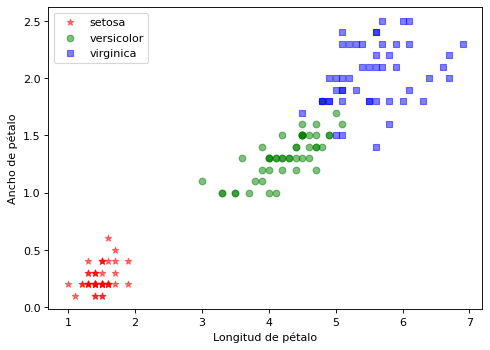

In [6]:
import matplotlib.pyplot as plt
clases = iris['target_names']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y==i,0], X[y==i,1], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

### Preparamos las estructuras de datos de salida para entrenar 

Adecuamos las etiquetas de $\{0, 1, 2\}$ al modelo binario $\{(1,0,0); (0,1,0); (0,0,1)\}$

In [9]:
## Primero se determina el número de neuronas de salida en función de las distintas etiquetas
nNeur = len(np.unique(y))
## Se convierte la lista inicial y en una lista multineurona
yNeur = [[0 for k in range(nNeur)] for i in range(np.size(y))]
for i in range(np.size(y)):
    yNeur[i][int(y[i])] = 1


In [10]:
nEntrada = np.size(X[0])
print("Nº neuronas=", nEntrada, nNeur)
misCapas=[nEntrada, nNeur]
print(misCapas)
clf = AdalineGD(eta=0.01, n_iter=2500, capas=misCapas, random_state=1)
clf.fit(X, yNeur)

Nº neuronas= 2 3
[2, 3]
Epoca =====> 200 Coste ====> 22.476731371479918
Epoca =====> 400 Coste ====> 20.463078887525846
Epoca =====> 600 Coste ====> 19.569397767672147
Epoca =====> 800 Coste ====> 19.044232108145877
Epoca =====> 1000 Coste ====> 18.691518103933248
Epoca =====> 1200 Coste ====> 18.434887944811592
Epoca =====> 1400 Coste ====> 18.23793150126699
Epoca =====> 1600 Coste ====> 18.080908693488148
Epoca =====> 1800 Coste ====> 17.952107234200376
Epoca =====> 2000 Coste ====> 17.84409624273631
Epoca =====> 2200 Coste ====> 17.75191055232349
Epoca =====> 2400 Coste ====> 17.672092904978285
Epoca =====> 2500 Coste ====> 17.636016099547206


In [11]:
print(clf.w_)
y_pred= clf.predict(X)
print("Hecho. Número de predicciones", y_pred.shape[0])

[[  6.56335393  -1.80522402  -2.75501148]
 [ -2.81821411   1.68509239  -3.41750344]
 [-10.87746601   0.71555428   4.49594094]]
Hecho. Número de predicciones 150


In [13]:
tot_Test = y_pred.shape[0]
tot_aciertos = 0
for i in range(tot_Test):
    estimado = y_pred[i]
    etiqueta, = np.where(np.isclose(estimado, np.max(estimado)))
    real = y[i]
    if int(real) == int(etiqueta[0]):
        tot_aciertos += 1
    #print('Instancia %s Clase real %s Clase estimada %s - Probabilidad estimada %s \n' %(X[i], real, etiqueta[0], estimado))
print('Precisión del clasificador %s \n' %(tot_aciertos*100/tot_Test))

Precisión del clasificador 94.66666666666667 



### Finalmente se visualiza la estimación realizada

Se visualiza de forma independiente los separadores de clase basados en la matriz de pesos

In [14]:
# Dado w_i0 + w_i1*x + w_i2*y = 0
# y = (-1/w_i2) * (w_i0 + w_i1*x)
def getOrdenadaRecta(matW, iNeur, x):
    return (-1/matW[iNeur,2])*(matW[iNeur,0] + matW[iNeur,1]*x)

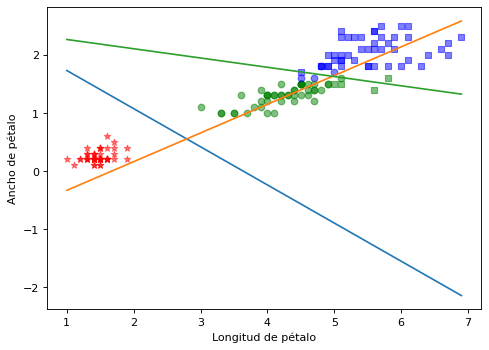

In [15]:
import matplotlib.pyplot as plt
marcas = ['*', 'o', 's']
clases=iris['target_names']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
lst_x = np.linspace(min(X[:,0]), max(X[:,0]), 50)
for i in range(len(X)):
    estimado = y_pred[i]
    etiqueta, = np.where(np.isclose(estimado, np.max(estimado)))
    ik = int(etiqueta[0])
    ic = int(y[i])
    plt.scatter(X[i,0], X[i,1], c=color[ik], alpha=0.5, marker=marcas[ic])
## Se grafican las 3 rectas delimitadoras
plt.plot(lst_x, getOrdenadaRecta(clf.w_, 0, lst_x))
plt.plot(lst_x, getOrdenadaRecta(clf.w_, 1, lst_x))
plt.plot(lst_x, getOrdenadaRecta(clf.w_, 2, lst_x))
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.show()

Se observa que las 3 clases que son __linealmente separables__. Cada una de las clases cumple estar por encima de una de las recta maximizando el valor de la activación.  

## Finalmente se hace una ejecución con todas las características disponibles en Iris

La dimensión de las variables de entrada será 4 en lugar de 2

In [20]:
X = df.values[:,0:4]
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [21]:
nEntrada = np.size(X[0])
misCapas=[nEntrada, nNeur]
print(misCapas)
clf = AdalineGD(eta=0.01, n_iter=2500, capas=misCapas, random_state=1)
clf.fit(X, yNeur)

[4, 3]
Epoca =====> 200 Coste ====> 25.971554575428495
Epoca =====> 400 Coste ====> 22.550781958031912
Epoca =====> 600 Coste ====> 15.068320267798205
Epoca =====> 800 Coste ====> 18.484781068118693
Epoca =====> 1000 Coste ====> 16.96325092234469
Epoca =====> 1200 Coste ====> 16.46269501878325
Epoca =====> 1400 Coste ====> 16.15737364989265
Epoca =====> 1600 Coste ====> 15.95056760936788
Epoca =====> 1800 Coste ====> 15.796724289296478
Epoca =====> 2000 Coste ====> 15.673277393750416
Epoca =====> 2200 Coste ====> 15.56844146848627
Epoca =====> 2400 Coste ====> 15.475794687337428
Epoca =====> 2500 Coste ====> 15.43284359884495


In [22]:
print(clf.w_)
y_pred= clf.predict(X)
print("Hecho. Número de predicciones", y_pred.shape[0])

[[ 0.35197473  0.52725999  1.82468036 -2.87215492 -1.33354983]
 [ 3.7267083   0.94325125 -3.34458687  1.60890356 -4.3935664 ]
 [-3.32555071 -3.02784207 -3.13461691  4.60395612  5.23736492]]
Hecho. Número de predicciones 150


In [23]:
tot_Test = y_pred.shape[0]
tot_aciertos = 0
for i in range(tot_Test):
    estimado = y_pred[i]
    etiqueta, = np.where(np.isclose(estimado, np.max(estimado)))
    real = y[i]
    if int(real) == int(etiqueta[0]):
        tot_aciertos += 1
    #print('Instancia %s Clase real %s Clase estimada %s - Probabilidad estimada %s \n' %(X[i], real, etiqueta[0], estimado))
print('Precisión del clasificador %s \n' %(tot_aciertos*100/tot_Test))

Precisión del clasificador 95.33333333333333 



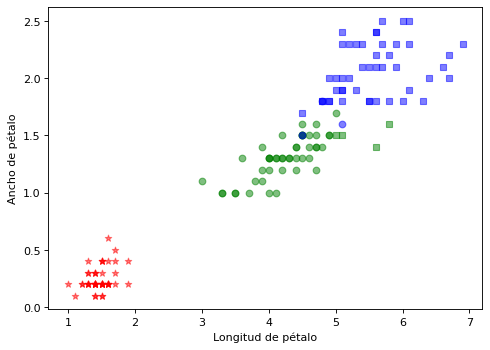

In [24]:
import matplotlib.pyplot as plt
marcas = ['*', 'o', 's']
clases=iris['target_names']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(X)):
    estimado = y_pred[i]
    etiqueta, = np.where(np.isclose(estimado, np.max(estimado)))
    ik = int(etiqueta[0])
    ic = int(y[i])
    plt.scatter(X[i,2], X[i,3], c=color[ik], alpha=0.5, marker=marcas[ic])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.show()

## Funciones de activación

Echemos un vistazo a las funciones de activación más importantes

In [25]:
def sigmoid(x):
    #return 1.0/(1.0 + np.exp(-x))  ## versión básica con problemas de desbordamiento en valores x<<<0
    #return np.where(x < 0, np.exp(x)/(1.0 + np.exp(x)), 1.0/(1.0 + np.exp(-x)))
    #return 1. / (1. + np.exp(-np.clip(x, -250, 250)))
    from scipy.special import expit
    return expit(x)  ##Función sigmoidea de scipy; algo más lenta
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 
def tanh(x):
    return np.tanh(x)
 
def tanh_derivada(x):
    return 1.0 - np.tanh(x)**2

def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivada(x):
    return np.where(x <= 0, 0, 1)

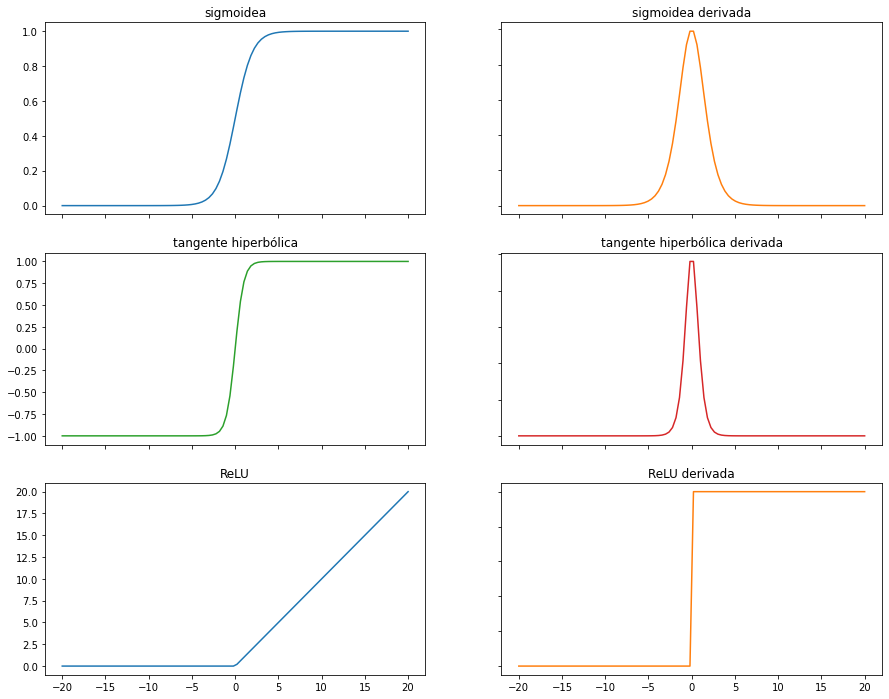

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
x = np.linspace(-20, 20, 100)
axs[0][0].plot(x, sigmoid(x))
axs[0][0].set_title("sigmoidea")
axs[0][1].plot(x, sigmoid_derivada(x), 'tab:orange')
axs[0][1].set_title("sigmoidea derivada")
axs[1][0].plot(x, tanh(x), 'tab:green')
axs[1][0].set_title("tangente hiperbólica")
axs[1][1].plot(x, tanh_derivada(x), 'tab:red')
axs[1][1].set_title("tangente hiperbólica derivada")
axs[2][0].plot(x, ReLU(x))
axs[2][0].set_title("ReLU")
axs[2][1].plot(x, ReLU_derivada(x), 'tab:orange')
axs[2][1].set_title("ReLU derivada")

for ax in fig.get_axes():
    ax.label_outer()

__La función sigmoidea o logística__:

- Satura y anula el gradiente.
- Lenta convergencia.
- No esta centrada en el cero.
- Esta acotada entre 0 y 1.
- Buen rendimiento en la última capa.

__La función tangente hiperbólica__ es muy similar a la sigmoidea:

- Satura y anula el gradiente.
- Lenta convergencia.
- Centrada en 0.
- Esta acotada entre -1 y 1.
- Se utiliza para clasificaciones binarias.
- Buen desempeño en redes recurrentes (que se utilizan para analizar series temporales).

__La función ReLU (Rectified Lineal Unit)__:

- Solo se activa si son positivos.
- No está acotada.
- Puede anular demasiadas neuronas.
- Se comporta bien con imágenes.
- Buen desempeño en redes convolucionales

Otra función de activación muy utilizada es __Softmax__ que transforma las salidas a una representación __en forma de probabilidades__, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1. Se utiliza para para __normalizar tipos multiclase__.

## Implementación del modelo bicapa en sk-learn

El modelo bicapa se encuentra implementado en la clase __sklearn.linear_model.Perceptron__. 

El __constructor__ de la clase, por ejemplo, los siguientes __parámetros__:

- __penalty__ {‘l2’,’l1’,’elasticnet’}, (por defecto=None). Son los coeficientes de regularización __Lasso (L1)__ o $\lambda|w|$, __Ridge (L2) o $\lambda w^2$__ y __Elastic Net__ (L1 + L2). Es una manera de evitar el sobreajuste (overfitting) penalizando los altos valores de los coeficientes de regresión.
- __alpha__ : ratio de aprendizaje (por defecto 0.0001).
- __fit_intercept__ : (por defecto=True). Indica si se debe calcular el bias o ha de ser cero (datos centrados).
- __max_iter__ : (por defecto=1000). Número de épocas.
- __random_state__: (por defecto=None). Semilla random.
- __tol__: (por defecto 1e-3). Criterio de parada. Si no es None termina cuando __coste - coste_previo < tol__.

Algunos de las __propiedades__ que se pueden consultar una vez creado el objeto con el constructor y realizado el ajuste son:

- <b>coef_</b>, <b>intercept_</b>: pesos y bias.

Y los __métodos__ más importantes son:

- <b>fit</b>(X, y) : realiza el ajuste.
- <b>predict</b>(X): realiza la predicción
- <b>score</b>(X, y) : devuelve la exactitud o accuracy.


In [27]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=None, max_iter=3000, alpha=0.01, random_state=0)
clf.fit(X,y)
clf.score(X,y)

0.8933333333333333